In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:

# Data Load
DATA_PATH = r'C:\Users\Naing\Desktop\Git_project\AI_2026\Day05 Decision tree and Essemble method\groupA\shin_bank_marketing'
df = pd.read_csv(f'{DATA_PATH}\\bank.csv')

# 2. Data Preprocessing
# Categorical columns များကို numeric ပြောင်းခြင်း
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
print("Bank shape:", df.shape) 

Bank shape: (11162, 17)


C:\Users\Naing\AppData\Local\Temp\ipykernel_19568\1152943654.py:8: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


In [19]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature နှင့် Target ခွဲထုတ်ခြင်း (Target သည် 'deposit' ဖြစ်သည်)
X = df.drop('loan', axis=1)
y = df['loan']

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [20]:
# 4. Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")

Decision Tree Accuracy: 0.8701


In [21]:
# 5. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")

Random Forest Accuracy: 0.8760


C:\Users\Naing\AppData\Local\Temp\ipykernel_19568\2318258911.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


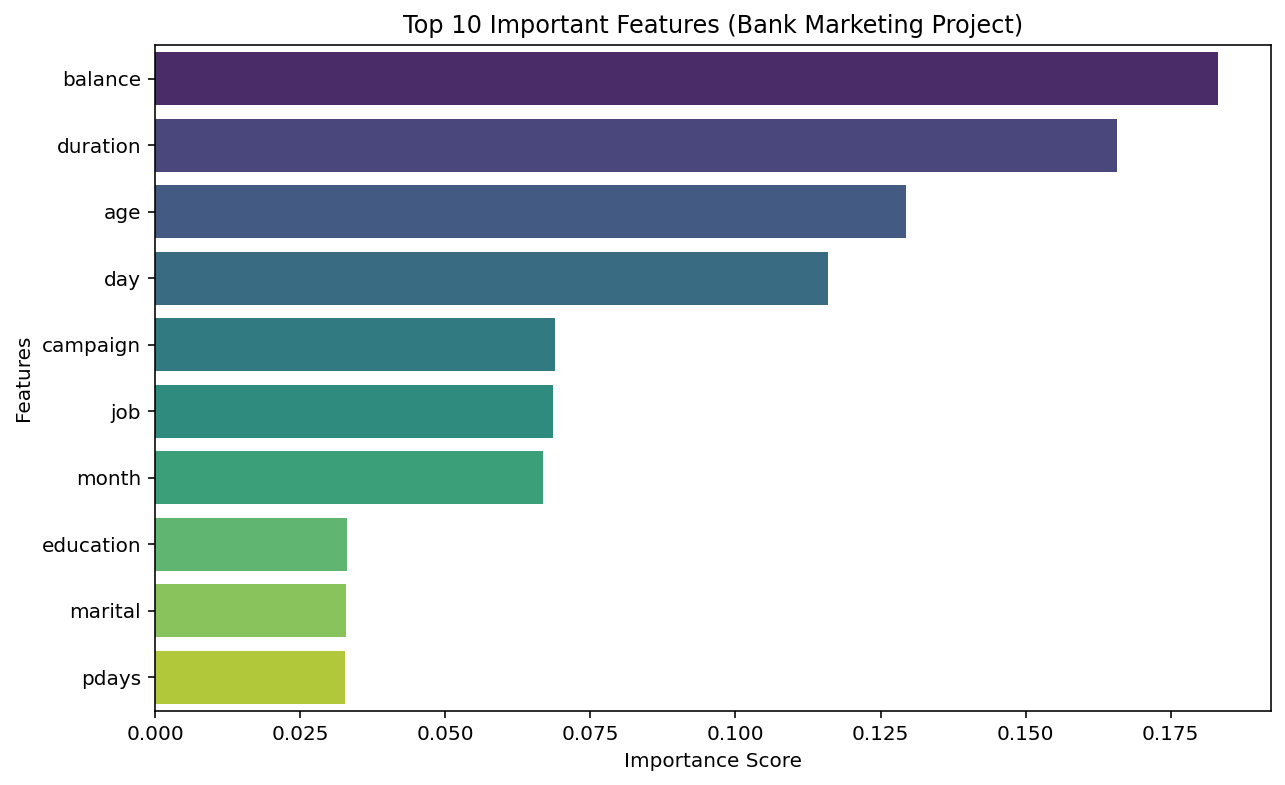

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Importance တွက်ချက်ခြင်း
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Importance အလိုက် အကြီးကနေ အငယ် စီခြင်း
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 2. Graph ဆွဲခြင်း
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')

plt.title('Top 10 Important Features (Bank Marketing Project)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


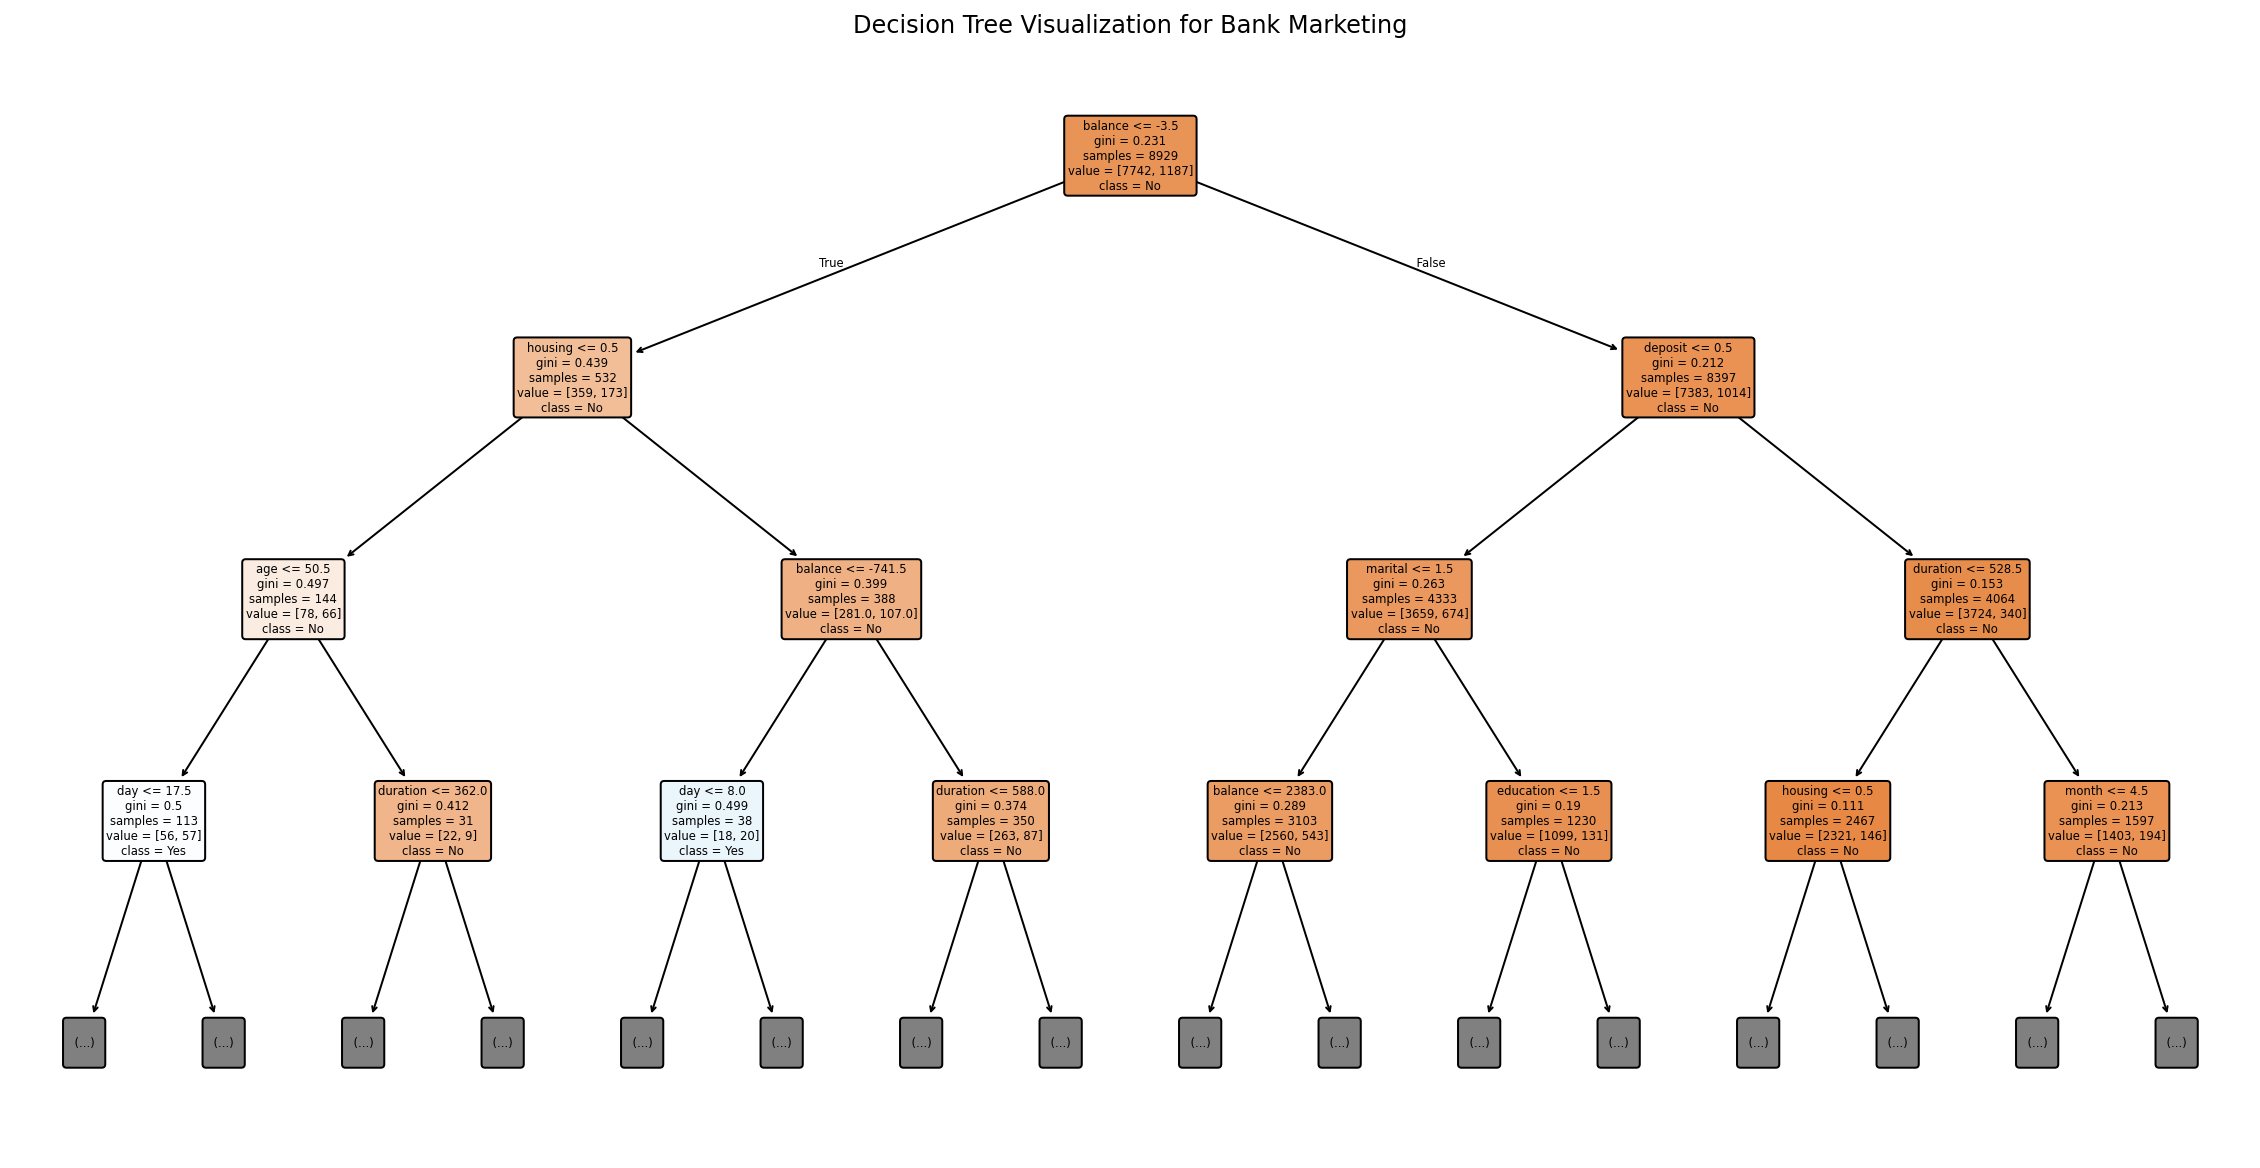

In [23]:
#For Tree Photo

from sklearn.tree import plot_tree

# Decision Tree ပုံဆွဲရန် Size သတ်မှတ်ခြင်း
plt.figure(figsize=(20, 20))

# plot_tree သုံးပြီး Visualization လုပ်ခြင်း
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True, 
          max_depth=3) # ပုံ အရမ်းမရှုပ်သွားအောင် depth ကို ၃ ဆင့်ပဲ ပြထားပါတယ်

plt.title("Decision Tree Visualization for Bank Marketing")
plt.show()